试求 $\int_{0}^{+\infty} x^{\frac{3}{2}} e^{-x} dx$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Define the function to integrate
def f(x):
    return x ** (3/2) * np.exp(-x)

# upper and lower limits of integration
a, b = 0, 100 # 100 is large enough for the exponential to be close to zero

# Perform the integration
true_value, error = integrate.quad(f, a, b)

# Print the result
print(f"The true value of the integration is: {true_value:.4f}")
print(f"The error bound is: {error:.4f}")

The true value of the integration is: 1.3293
The error bound is: 0.0000


In [3]:
# Importance Sampling using g(x) = e^(-x)
importance_dist = {
    'sample': lambda n: np.random.exponential(1, n),
    'pdf': lambda x: np.exp(-x)
}

In [4]:
from Monte_Carlo import compare

# Define different numbers of samples to test
n_samples_list = np.logspace(2, 5, num=20, base=10, dtype=int)

# Number of experiments to run for each sample size
n_exp = 100  # Adjust as needed

mc_mean, stratified_mean, importance_mean, mc_se, stratified_se, importance_se = compare(n_samples_list, n_exp, f, a, b, true_value, importance_dist)

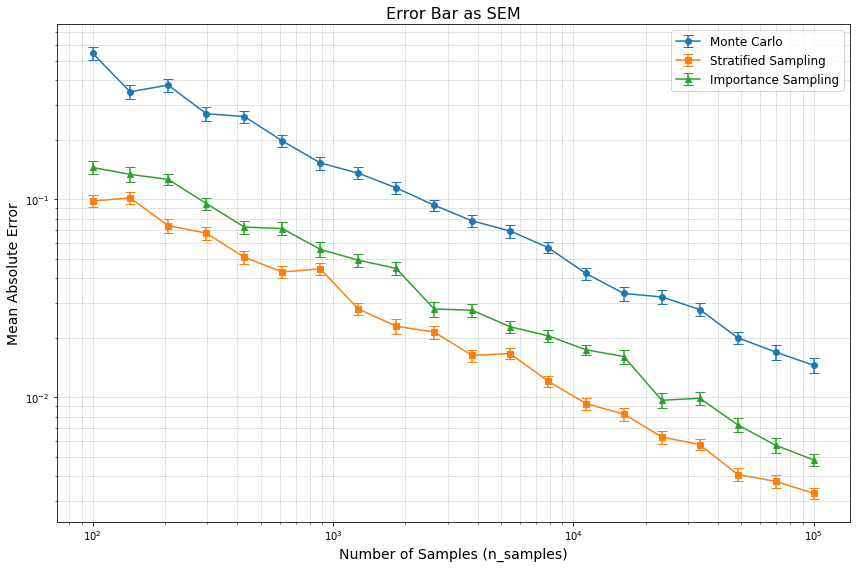

In [5]:
# Create a semilogarithmic plot for absolute errors with error bars
plt.figure(figsize=(12, 8))

# Plot Mean Absolute Errors with Error Bars
plt.errorbar(n_samples_list, mc_mean, yerr=mc_se, fmt='o-', label='Monte Carlo', capsize=5)
plt.errorbar(n_samples_list, stratified_mean, yerr=stratified_se, fmt='s-', label='Stratified Sampling', capsize=5)
plt.errorbar(n_samples_list, importance_mean, yerr=importance_se, fmt='^-', label='Importance Sampling', capsize=5)

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Labels and Title
plt.xlabel('Number of Samples (n_samples)', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.title('Error Bar as SEM', fontsize=16)

# Legend
plt.legend(fontsize=12)

# Grid for better readability
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

采样方法：
1. 反函数法
2. Metropolis
3. 库函数
4. 舍选

简洁写法

In [6]:
import numpy as np
np.random.seed(42)
N = 100000
uniform_samples = np.random.uniform(0, 1, N)
exp_samples = -np.log(uniform_samples)
f_values = exp_samples ** (3/2)
I_estimate = np.mean(f_values)
print(f'估计的积分值为: {I_estimate}')

估计的积分值为: 1.33031546799973


In [7]:
import numpy as np
print(f'估计的积分值为: {np.mean((-np.log(np.random.uniform(0, 1, 100000))) ** (3/2))}')

估计的积分值为: 1.3203821046723638


FAQ

9484


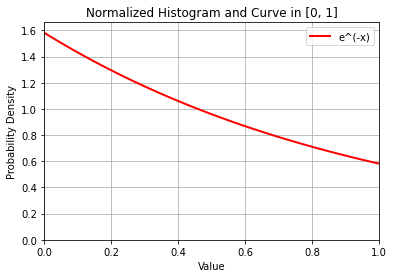

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def g(y):
    return np.exp(-y)


samples = np.empty([])
# 迭代次数 N
N = 10 ** 4
# 初始值 x
x = 0
# 步长 delta
delta = 0.1

# 初始化计数器 k 和累加器 sum
k = 0
sum = 0  # 初始累加值为 h(x)

# 开始迭代过程
for i in range(N):
    # 新的位置 x_try
    eta = np.random.uniform(-delta, delta)  # 随机偏移量
    x_try = x + eta

    # 确保 x_try 在积分区间 [0, 1] 内

    if x_try > 1:
        x_try -= 1
    elif x_try < 0:
        x_try += 1

    # 计算接受率 r
    r = min(1, g(x_try) / g(x))

    # 根据接受率 r 决定是否接受 x_try
    if r >= 1:  # 如果 r 大于等于 1，则总是接受 x_try
        x = x_try
    elif np.random.uniform(0, 1) < r:  # 否则，根据 r 的大小决定是否接受
        k += 1
        x = x_try
    else:
        continue

    samples = np.append(samples, x)

# 计算积分的估计值
integral_estimate = sum / k * (1 - np.exp(-1))
# print("Integral estimate:", integral_estimate)
print(len(samples))
# 绘制归一化的直方图
plt.hist(samples, bins=10, density=True, alpha=0.75,
         color='blue',
         edgecolor='black')

# 计算e^-x对应的y值
x_line = np.linspace(0, 1, 100)  # 在0到1之间创建100个点
y_line = np.exp(-x_line) / (1 - np.exp(-1))  # 计算e^-x对应的y值

# 绘制e^-x曲线
plt.plot(x_line, y_line, 'r-', lw=2, label='e^(-x)')  # 红色线条，线宽为2

# 设置图表标题和标签
plt.title('Normalized Histogram and Curve in [0, 1]')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()  # 添加图例
# 设置x轴的显示范围为[0, 1]
plt.xlim(0, 1)
# 显示图表
plt.grid(True)
plt.show()


100000


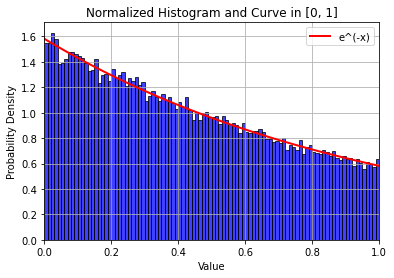

In [9]:
import numpy as np
from matplotlib import pyplot as plt

def g(y):
    return np.exp(-y)

samples = []
# 迭代次数 N
N = 100000
# 初始值 x
x = 0.5
# 步长 delta
delta = 0.5

# 初始化计数器 k 和累加器 sum
k = 0
sum = 0  # 初始累加值为 h(x)

a = 0
b = 1

# 开始迭代过程
for i in range(N):
    # 新的位置 x_try
    eta = np.random.uniform(-delta, delta)  # 随机偏移量
    # eta = np.random.normal(x, delta)  # 随机偏移量
    x_try = x + eta

    # 确保 x_try 在积分区间 [0, 1] 内

    # Apply PBC: wrap proposal_x within [a, b]
    if x_try < a:
        x_try = b - (a - x_try) % (b - a)
    elif x_try > b:
        x_try = a + (x_try - b) % (b - a)

    # Calculate acceptance ratio
    acceptance_ratio = min(1, g(x_try) / g(x))
    
    # Accept or reject the proposal
    if np.random.rand() < acceptance_ratio:
        x = x_try  # Accept the proposal

    # # 计算接受率 r
    # r = g(x_try) / g(x)

    # # 根据接受率 r 决定是否接受 x_try
    # if r >= 1:  # 如果 r 大于等于 1，则总是接受 x_try
    #     k += 1
    #     sum += h(x_try)
    #     x = x_try
    # elif np.random.uniform(0, 1) < r:  # 否则，根据 r 的大小决定是否接受
    #     k += 1
    #     sum += h(x_try)
    #     x = x_try
    # else:
    #     continue

    samples.append(x)

print(len(samples))
# 绘制归一化的直方图
plt.hist(samples, bins=100, density=True, alpha=0.75,
         color='blue',
         edgecolor='black')

# 计算e^-x对应的y值
x_line = np.linspace(0, 1, 100)  # 在0到1之间创建100个点
y_line = np.exp(-x_line) / (1 - np.exp(-1))  # 计算e^-x对应的y值

# 绘制e^-x曲线
plt.plot(x_line, y_line, 'r-', lw=2, label='e^(-x)')  # 红色线条，线宽为2

# 设置图表标题和标签
plt.title('Normalized Histogram and Curve in [0, 1]')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()  # 添加图例
# 设置x轴的显示范围为[0, 1]
plt.xlim(0, 1)
# 显示图表
plt.grid(True)
plt.show()


In [10]:
max(samples)

0.9999969038526391

In [11]:
samples = np.empty([])

83646


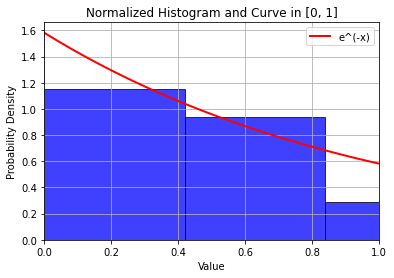

In [12]:
import numpy as np
from matplotlib import pyplot as plt


# 先对被积函数 f(x)=x^3/2*e^-x 进行变换，使得积分区间变换到[0,1]内
# 令y=e^-x,将被积函数变为h(x)=(-lny)^(3/2)，积分区间为[0,1]

def g(y):
    return np.exp(-y)


def h(y):
    return ((-np.log(y)) ** (3 / 2)) * np.exp(y)


samples = np.empty([])
# 迭代次数 N
N = 100000
# 初始值 x
x = 0
# 步长 delta
delta = 0.5

# 初始化计数器 k 和累加器 sum
k = 0
sum = 0  # 初始累加值为 h(x)

# 开始迭代过程
for i in range(N):
    # 新的位置 x_try
    eta = np.random.uniform(-delta, delta)  # 随机偏移量
    x_try = x + eta

    # 确保 x_try 在积分区间 [0, 1] 内

    if x_try > 1:
        x_try -= 1
    elif x_try < 0:
        x_try += 1

    # 计算接受率 r
    r = g(x_try) / g(x)

    # 根据接受率 r 决定是否接受 x_try
    if r >= 1:  # 如果 r 大于等于 1，则总是接受 x_try
        k += 1
        sum += h(x_try)
        x = x_try
    elif np.random.uniform(0, 1) < r:  # 否则，根据 r 的大小决定是否接受
        k += 1
        sum += h(x_try)
        x = x_try
    else:
        continue

    samples = np.append(samples, x)

# 计算积分的估计值
integral_estimate = sum / k * (1 - np.exp(-1))
# print("Integral estimate:", integral_estimate)
print(len(samples))
# 绘制归一化的直方图
plt.hist(samples, bins=100, density=True, alpha=0.75,
         color='blue',
         edgecolor='black')

# 计算e^-x对应的y值
x_line = np.linspace(0, 1, 100)  # 在0到1之间创建100个点
y_line = np.exp(-x_line) / (1 - np.exp(-1))  # 计算e^-x对应的y值

# 绘制e^-x曲线
plt.plot(x_line, y_line, 'r-', lw=2, label='e^(-x)')  # 红色线条，线宽为2

# 设置图表标题和标签
plt.title('Normalized Histogram and Curve in [0, 1]')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()  # 添加图例
# 设置x轴的显示范围为[0, 1]
plt.xlim(0, 1)
# 显示图表
plt.grid(True)
plt.show()
